In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
data = pd.read_excel('FinalTable.xlsx',encoding= 'unicode_escape')

In [50]:
data.head()

,id,url,brand,item,category1,category2,category3,price,value_price,Size,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
0,2218774,https://www.sephora.com//product/blu-mediterra...,Acqua di Parma,Blu Mediterraneo MINIATURE Set,Fragrance,Mini Size,NaN,66.0,75.0,5mL,...,0,0,0,0,0,0,0,0,0,0
1,1417609,https://www.sephora.com//product/blu-mediterra...,Acqua di Parma,Fico di Amalfi,Fragrance,Women,Perfume,180.0,180.0,150 Ml,...,0,0,0,0,0,0,0,0,0,0
2,2375558,https://www.sephora.com//product/acqua-di-parm...,Acqua di Parma,Colonia Futura Eau de Cologne,Fragrance,Women,Perfume,170.0,170.0,100 mL,...,0,0,0,0,0,0,1,0,0,0
3,1638832,https://www.sephora.com//product/rosa-nobile-P...,Acqua di Parma,Rosa Nobile,Fragrance,Women,Perfume,210.0,210.0,101 mL,...,0,0,0,0,0,0,0,0,0,0
4,1417567,https://www.sephora.com//product/blu-mediterra...,Acqua di Parma,Arancia di Capri,Fragrance,Women,Perfume,180.0,180.0,150 mL,...,0,0,0,0,0,0,1,0,0,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 27 columns):
id                 8261 non-null int64
url                8261 non-null object
brand              8261 non-null object
item               8261 non-null object
category1          8261 non-null object
category2          8256 non-null object
category3          7213 non-null object
price              8261 non-null float64
value_price        8261 non-null float64
Size               5262 non-null object
size2              5262 non-null object
review             8261 non-null float64
number             8261 non-null int64
love               8261 non-null float64
online_only        8261 non-null int64
limited_edition    8261 non-null int64
exclusive          8261 non-null int64
new                8261 non-null int64
clean              8261 non-null int64
top_seller         8261 non-null int64
best_makeup        8261 non-null int64
best_skincare      8261 non-null int64
best_fragrance     

In [52]:
data.columns

Index(['id', 'url', 'brand', 'item', 'category1', 'category2', 'category3',
       'price', 'value_price', 'Size', 'size2', 'review', 'number', 'love',
       'online_only', 'limited_edition', 'exclusive', 'new', 'clean',
       'top_seller', 'best_makeup', 'best_skincare', 'best_fragrance',
       'best_men', 'best_bathbody', 'best_hair', 'best_tool'],
      dtype='object')

In [53]:
data.index

RangeIndex(start=0, stop=8261, step=1)

In [54]:
data.duplicated().value_counts()

False    8261
dtype: int64

In [55]:
miss=data[data['review'].isnull() & data['number']>0]

In [56]:
miss.url

Series([], Name: url, dtype: object)

In [57]:
mycols=['id','brand','category1', 'category2','price', 'value_price',
        'review', 'number', 'love','online_only', 'limited_edition',
        'exclusive', 'new', 'clean','top_seller', 'best_makeup',
        'best_skincare', 'best_fragrance','best_men', 'best_bathbody', 
        'best_hair', 'best_tool']
df=data[mycols]

In [58]:
df

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
0,2218774,Acqua di Parma,Fragrance,Mini Size,66.0,75.0,4.0,5,4700.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1417609,Acqua di Parma,Fragrance,Women,180.0,180.0,4.5,84,3200.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2375558,Acqua di Parma,Fragrance,Women,170.0,170.0,3.0,2,242.0,1,...,0,0,0,0,0,0,1,0,0,0
3,1638832,Acqua di Parma,Fragrance,Women,210.0,210.0,4.5,82,5800.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1417567,Acqua di Parma,Fragrance,Women,180.0,180.0,4.0,30,3000.0,1,...,0,0,0,0,0,0,1,0,0,0
5,1417575,Acqua di Parma,Fragrance,Women,120.0,120.0,4.5,46,3200.0,1,...,0,0,0,0,0,0,0,0,0,0
6,2375566,Acqua di Parma,Fragrance,Women,55.0,55.0,0.0,0,347.0,1,...,1,0,0,0,0,0,0,0,0,0
7,2376176,Acqua di Parma,Fragrance,Value & Gift Sets,95.0,115.0,0.0,0,136.0,1,...,1,0,0,0,0,0,0,0,0,0
8,2044816,Acqua di Parma,Fragrance,Men,66.0,66.0,4.5,76,3100.0,1,...,0,0,0,0,0,0,0,0,0,0
9,2221588,Acqua di Parma,Fragrance,Women,58.0,58.0,4.0,8,1500.0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.iloc[0:4]

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
0,2218774,Acqua di Parma,Fragrance,Mini Size,66.0,75.0,4.0,5,4700.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1417609,Acqua di Parma,Fragrance,Women,180.0,180.0,4.5,84,3200.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2375558,Acqua di Parma,Fragrance,Women,170.0,170.0,3.0,2,242.0,1,...,0,0,0,0,0,0,1,0,0,0
3,1638832,Acqua di Parma,Fragrance,Women,210.0,210.0,4.5,82,5800.0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df[(df['clean'] == 1)&(df['category1']=='Skincare')]

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
144,2331809,alpyn beauty,Skincare,Moisturizers,60.0,60.0,4.5,222,6200.0,1,...,0,1,0,0,0,0,0,0,0,0
145,2331817,alpyn beauty,Skincare,Eye Care,62.0,62.0,4.5,138,6500.0,1,...,0,1,0,0,0,0,0,0,0,0
146,2331825,alpyn beauty,Skincare,Treatments,68.0,68.0,4.5,85,4600.0,1,...,0,1,0,0,0,0,0,0,0,0
147,2331882,alpyn beauty,Skincare,Cleansers,36.0,36.0,4.5,120,8700.0,1,...,0,1,0,0,0,0,0,0,0,0
148,2404663,alpyn beauty,Skincare,Masks,56.0,56.0,5.0,90,565.0,1,...,1,1,0,0,0,0,0,0,0,0
149,2331833,alpyn beauty,Skincare,Masks,68.0,68.0,4.5,97,5200.0,1,...,0,1,0,0,0,0,0,0,0,0
620,2375079,BeautyBio,Skincare,Value & Gift Sets,349.0,419.0,5.0,16,2500.0,1,...,1,1,0,0,0,0,0,0,0,0
621,2375061,BeautyBio,Skincare,Value & Gift Sets,199.0,279.0,5.0,23,1400.0,1,...,1,1,1,0,0,0,0,0,0,1
622,2163012,BeautyBio,Skincare,High Tech Tools,199.0,124.0,4.0,75,23700.0,0,...,0,1,0,0,0,0,0,0,0,0
623,2163145,BeautyBio,Skincare,Wellness,60.0,60.0,4.5,63,14800.0,0,...,0,1,0,0,0,0,0,0,0,1


In [61]:
options=['Skincare','Makeup']

In [62]:
df[df['category1'].isin(options)]

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
54,1738640,AERIN,Makeup,Lip,30.0,30.0,4.0,468,18900.0,1,...,0,0,0,0,0,0,0,0,0,0
75,2265858,Aether Beauty,Makeup,Eye,58.0,58.0,5.0,83,4600.0,1,...,0,1,0,0,0,0,0,0,0,0
76,2360444,Aether Beauty,Makeup,Mini Size,24.0,24.0,0.0,0,1300.0,0,...,1,1,0,0,0,0,0,0,0,0
77,2189959,Aether Beauty,Makeup,Eye,58.0,58.0,4.5,192,10300.0,0,...,0,1,0,0,0,0,0,0,0,0
78,2353969,Aether Beauty,Makeup,Eye,58.0,58.0,5.0,60,2100.0,1,...,0,1,0,0,0,0,0,0,0,0
79,2372332,Aether Beauty,Makeup,Cheek,44.0,44.0,5.0,56,4100.0,1,...,0,1,0,0,0,0,0,0,0,0
80,2353977,Aether Beauty,Makeup,Face,38.0,38.0,5.0,106,6000.0,1,...,0,1,0,0,0,0,0,0,0,0
81,2324978,Aether Beauty,Makeup,Lip,28.0,28.0,5.0,38,5900.0,1,...,0,1,0,0,0,0,0,0,0,0
82,1957182,Algenist,Skincare,Treatments,115.0,115.0,4.0,781,56100.0,0,...,0,0,0,0,0,0,0,0,0,0
83,2170827,Algenist,Skincare,Moisturizers,98.0,98.0,4.5,1000,24300.0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 22 columns):
id                 8261 non-null int64
brand              8261 non-null object
category1          8261 non-null object
category2          8256 non-null object
price              8261 non-null float64
value_price        8261 non-null float64
review             8261 non-null float64
number             8261 non-null int64
love               8261 non-null float64
online_only        8261 non-null int64
limited_edition    8261 non-null int64
exclusive          8261 non-null int64
new                8261 non-null int64
clean              8261 non-null int64
top_seller         8261 non-null int64
best_makeup        8261 non-null int64
best_skincare      8261 non-null int64
best_fragrance     8261 non-null int64
best_men           8261 non-null int64
best_bathbody      8261 non-null int64
best_hair          8261 non-null int64
best_tool          8261 non-null int64
dtypes: float64(4), int6

In [64]:
numeric=['price','value_price','review','number','love']
df_numeric=data[numeric]

In [65]:
df_numeric.describe().round(2)

,price,value_price,review,number,love
count,8261.00,8261.00,8261.00,8261.00,8261.0
mean,50.37,53.03,3.99,317.03,19363.9
std,47.90,51.73,0.97,949.96,48127.0
min,2.00,2.00,0.00,0.00,0.0
25%,25.00,25.00,4.00,13.00,2200.0
50%,35.00,36.00,4.00,58.00,6100.0
75%,58.00,62.00,4.50,260.00,17000.0
max,549.00,638.00,5.00,19000.00,1300000.0


In [66]:
df_numeric.corr()

,price,value_price,review,number,love
price,1.000000,0.973225,0.006085,-0.083177,-0.094669
value_price,0.973225,1.000000,-0.019355,-0.091101,-0.100156
review,0.006085,-0.019355,1.000000,0.086578,0.098960
number,-0.083177,-0.091101,0.086578,1.000000,0.752903
love,-0.094669,-0.100156,0.098960,0.752903,1.000000


In [67]:
df.describe(exclude=np.number)

,brand,category1,category2
count,8261,8261,8256
unique,303,8,39
top,SEPHORA COLLECTION,Makeup,Women
freq,286,2704,879


In [68]:
df.iloc[df['price'].idxmax()] #Most expensive item

id                    2162493
brand                   dyson
category1                Hair
category2          Hair Tools
price                     549
value_price               549
review                      4
number                    652
love                    67900
online_only                 0
limited_edition             0
exclusive                   0
new                         0
clean                       0
top_seller                  1
best_makeup                 0
best_skincare               0
best_fragrance              0
best_men                    0
best_bathbody               0
best_hair                   1
best_tool                   1
Name: 2700, dtype: object

In [69]:
df['best_tool'].value_counts()

0    8102
1     159
Name: best_tool, dtype: int64

In [75]:
df['clean'].value_counts()

0    7005
1    1256
Name: clean, dtype: int64

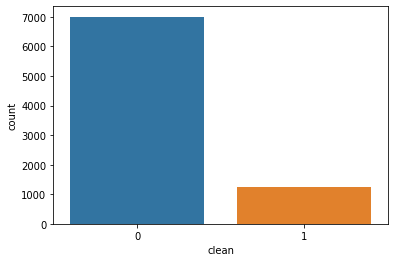

In [76]:
sns.countplot(df['clean'])

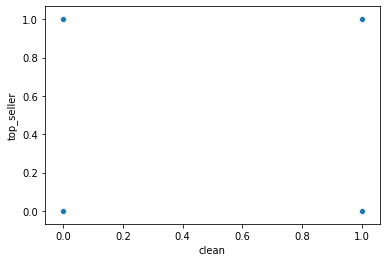

In [100]:
sns.scatterplot(x='clean',y='top_seller',data=df)

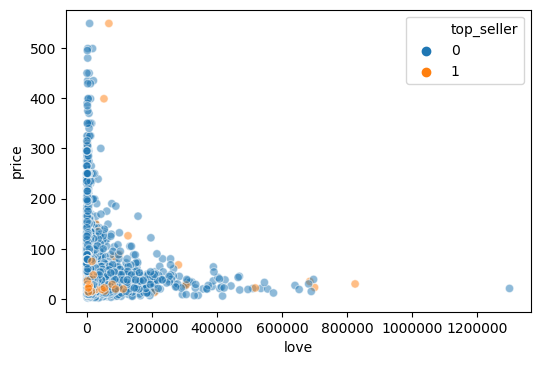

In [97]:
plt.figure(dpi=100)
sns.scatterplot(x='love',y='price',data=df,hue='top_seller',alpha=0.5)

Text(0.5, 0.92, '3-D')

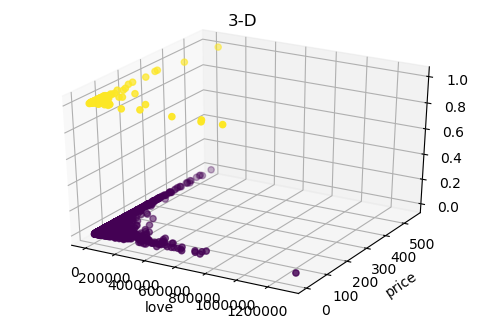

In [106]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['love'],df['price'],df['top_seller'],c=df['top_seller'])
plt.xlabel('love')
plt.ylabel('price')
plt.title('3-D')

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Amanda Lee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


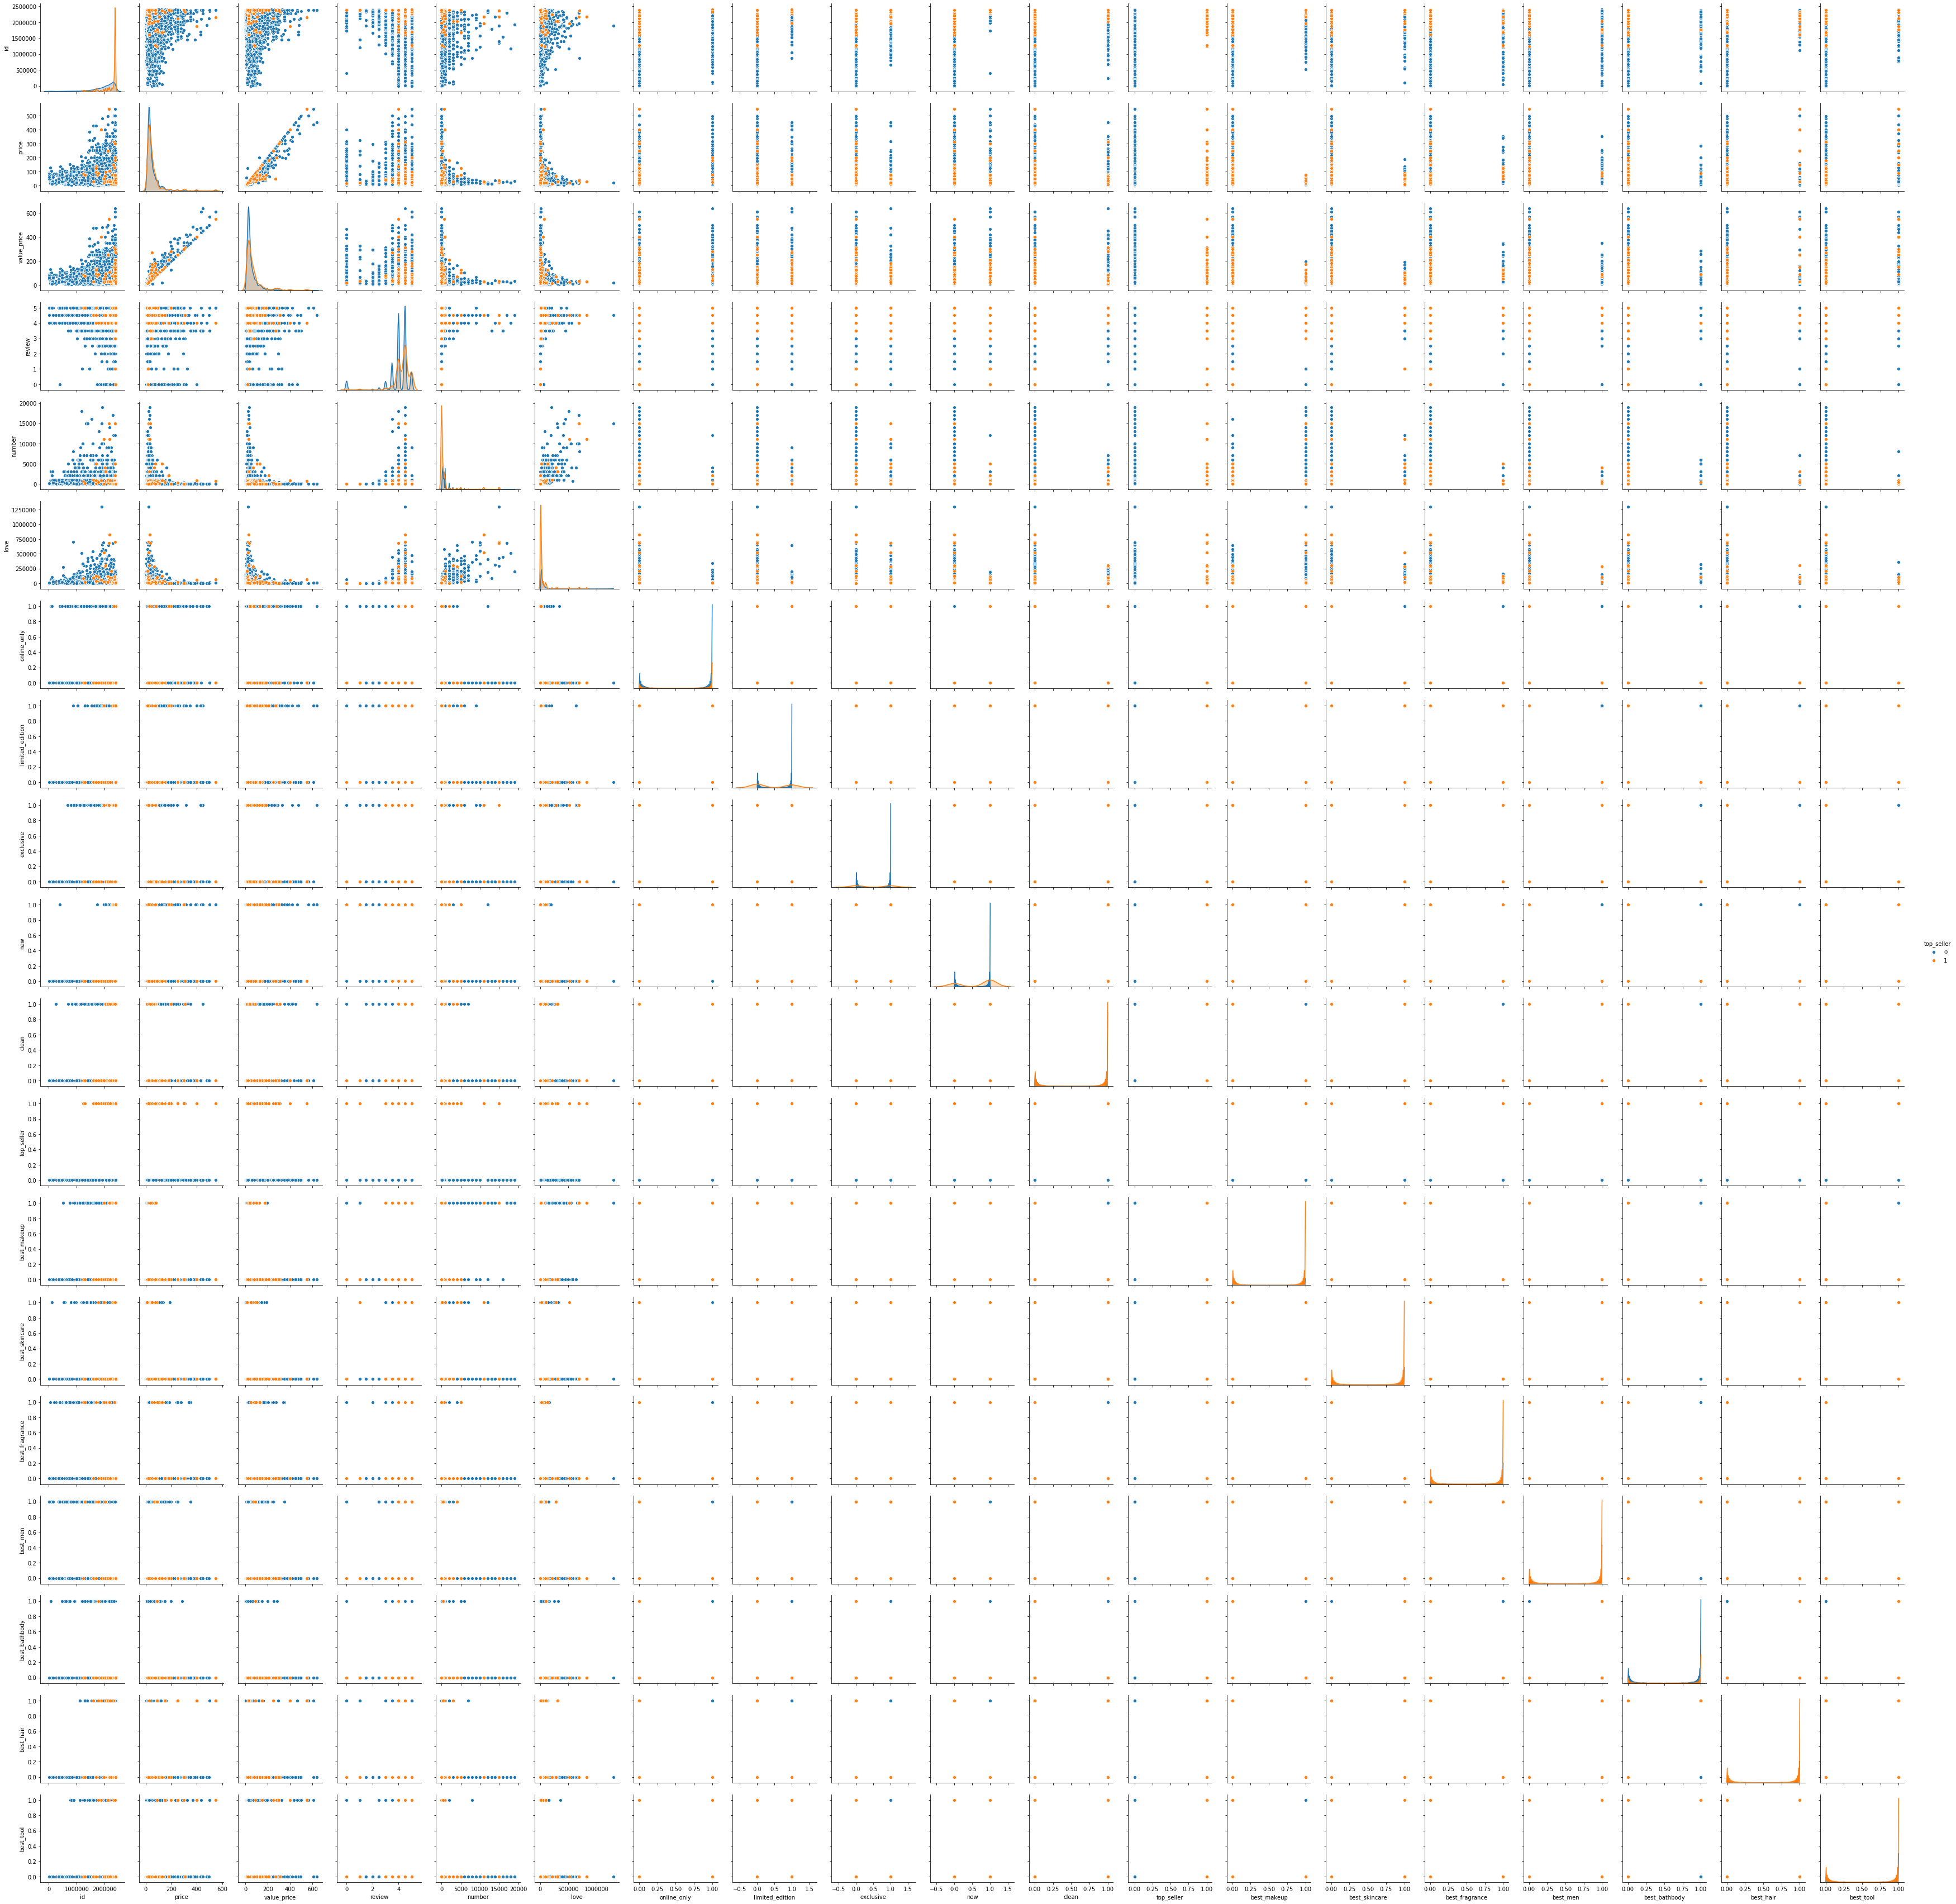

In [99]:
sns.pairplot(df,hue='top_seller')

In [175]:
independent=['clean','price']
X = df[independent]
y = df['top_seller']

In [165]:
X = np.array(X).reshape(-1, 1) 

In [166]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [168]:
log_model.fit(X,y)

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [169]:
log_model.C_

array([0.0001])

In [170]:
log_model.coef_

array([[0.00025347]])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [151]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [177]:
log_model = LogisticRegressionCV()

In [178]:
log_model.fit(X_train,y_train)

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [179]:
log_model.C_

array([0.0001])

In [180]:
log_model.coef_

array([[0.00021514, 0.00339115]])

In [181]:
y_pred=log_model.predict(X_test)

In [157]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
y_pred_pro=log_model.predict_proba(X_test)

In [159]:
y_pred_pro

array([[0.98426225, 0.01573775],
       [0.98426225, 0.01573775],
       [0.98426225, 0.01573775],
       ...,
       [0.98426225, 0.01573775],
       [0.98426225, 0.01573775],
       [0.98426225, 0.01573775]])

C:\Users\Amanda Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amanda Lee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Amanda Lee\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Amanda Lee\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


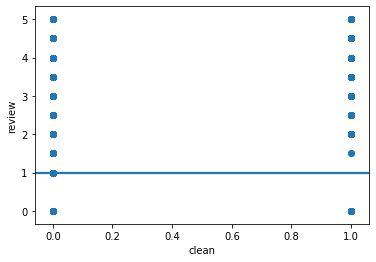

In [195]:
X = df['clean'].values.reshape(-1,1)
Y = df['review'].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X,np.ravel(Y.astype(int)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(X,Y)
plt.xlabel("Review")
plt.ylabel("Clean")

sns.regplot(x='clean', y='review', data=df, logistic=True)

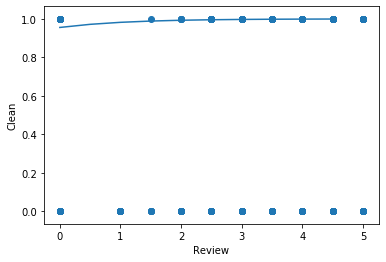

In [191]:
x = np.arange(0, 5, 0.5)
y = 1/(1+np.exp(-3.0681-0.9408*x))

Y = df['clean'].values.reshape(-1,1)
X = df['review'].values.reshape(-1,1)

plt.scatter(X,Y)
plt.xlabel("Review")
plt.ylabel("Clean")

plt.plot(x, y)
plt.show()

In [70]:
df['category1'].value_counts()

Makeup             2704
Skincare           2602
Fragrance          1404
Hair               1163
Bath & Body         246
Men                 108
Tools & Brushes      30
Gifts                 4
Name: category1, dtype: int64

In [71]:
df[df['price'].between(10,20,inclusive=True)]

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
52,2350965,adwoa beauty,Hair,Hair Styling & Treatments,20.0,20.0,4.5,20,3000.0,0,...,0,0,0,0,0,0,0,0,0,0
73,1736065,AERIN,Fragrance,Women,15.0,15.0,5.0,4,1200.0,1,...,0,0,0,0,0,0,0,0,0,0
134,2210466,Alpha-H,Skincare,Mini Size,20.0,20.0,4.0,24,5600.0,0,...,0,0,0,0,0,0,0,0,0,0
210,2035103,amika,Hair,Shampoo & Conditioner,18.0,18.0,3.5,63,6100.0,0,...,0,0,0,0,0,0,0,0,1,0
211,2035038,amika,Hair,Shampoo & Conditioner,16.0,16.0,4.0,50,4700.0,1,...,0,0,0,0,0,0,0,0,1,0
214,2035020,amika,Hair,Shampoo & Conditioner,16.0,16.0,4.0,28,3900.0,1,...,0,0,0,0,0,0,0,0,1,0
216,2190221,amika,Hair,Shampoo & Conditioner,20.0,20.0,3.5,116,7200.0,0,...,0,0,0,0,0,0,0,0,0,0
219,2035152,amika,Hair,Shampoo & Conditioner,16.0,16.0,4.0,43,5700.0,0,...,0,0,0,0,0,0,0,0,0,0
222,2035145,amika,Hair,Shampoo & Conditioner,16.0,16.0,4.0,32,3900.0,0,...,0,0,0,0,0,0,0,0,0,0
230,2042000,amika,Hair,Mini Size,12.0,12.0,4.0,160,17400.0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.nlargest(10,'love')

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
3925,1890623,KVD Vegan Beauty,Makeup,Lip,21.0,21.0,4.5,15000,1300000.0,0,...,0,0,0,1,0,0,0,0,0,0
5184,2172310,NARS,Makeup,Face,30.0,30.0,4.5,11000,825200.0,0,...,0,0,1,1,0,0,0,0,0,0
289,2372530,Anastasia Beverly Hills,Makeup,Eye,23.0,23.0,4.5,15000,700400.0,0,...,0,0,1,1,0,0,0,0,0,0
4275,870618,Laura Mercier,Makeup,Face,39.0,39.0,4.5,8000,697400.0,0,...,0,0,0,1,0,0,0,0,0,0
6335,1959386,SEPHORA COLLECTION,Makeup,Lip,15.0,15.0,4.5,10000,690400.0,0,...,0,0,0,1,0,0,0,0,0,0
3660,2164671,FENTY BEAUTY by Rihanna,Makeup,Face,35.0,35.0,4.0,15000,685800.0,0,...,0,0,1,1,0,0,0,0,0,0
5188,2296986,NARS,Makeup,Cheek,30.0,30.0,4.5,17000,682200.0,0,...,0,0,0,1,0,0,0,0,0,0
3663,1925965,FENTY BEAUTY by Rihanna,Makeup,Lip,19.0,19.0,4.5,10000,653100.0,0,...,0,0,0,1,0,0,0,0,0,0
3066,2137230,HUDA BEAUTY,Makeup,Eye,27.0,27.0,4.5,4000,640300.0,0,...,0,0,0,0,0,0,0,0,0,0
301,1941970,Anastasia Beverly Hills,Makeup,Eye,12.0,12.0,4.5,722,574200.0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.sort_values('love',ascending=False).iloc[0:6]

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
3925,1890623,KVD Vegan Beauty,Makeup,Lip,21.0,21.0,4.5,15000,1300000.0,0,...,0,0,0,1,0,0,0,0,0,0
5184,2172310,NARS,Makeup,Face,30.0,30.0,4.5,11000,825200.0,0,...,0,0,1,1,0,0,0,0,0,0
289,2372530,Anastasia Beverly Hills,Makeup,Eye,23.0,23.0,4.5,15000,700400.0,0,...,0,0,1,1,0,0,0,0,0,0
4275,870618,Laura Mercier,Makeup,Face,39.0,39.0,4.5,8000,697400.0,0,...,0,0,0,1,0,0,0,0,0,0
6335,1959386,SEPHORA COLLECTION,Makeup,Lip,15.0,15.0,4.5,10000,690400.0,0,...,0,0,0,1,0,0,0,0,0,0
3660,2164671,FENTY BEAUTY by Rihanna,Makeup,Face,35.0,35.0,4.0,15000,685800.0,0,...,0,0,1,1,0,0,0,0,0,0


In [74]:
df.sample(frac=0.8)

,id,brand,category1,category2,price,value_price,review,number,love,online_only,...,new,clean,top_seller,best_makeup,best_skincare,best_fragrance,best_men,best_bathbody,best_hair,best_tool
7242,2309250,tarte,Makeup,Eye,12.0,12.0,3.0,123,10800.0,0,...,0,0,0,0,0,0,0,0,0,0
4488,2369601,Maison Louis Marie,Fragrance,Men,20.0,20.0,5.0,2,942.0,0,...,1,1,0,0,0,0,1,1,0,0
1517,2360824,Charlotte Tilbury,Makeup,Lip,22.0,22.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5310,2183945,Natasha Denona,Makeup,Eye,48.0,48.0,4.0,25,4200.0,0,...,0,0,0,0,0,0,0,0,0,0
7557,2132645,TOM FORD,Makeup,Brushes & Applicators,115.0,115.0,3.5,19,3600.0,0,...,0,0,0,0,0,0,0,0,0,0
3979,2243905,KVD Vegan Beauty,Makeup,Mini Size,13.0,13.0,3.0,105,2400.0,0,...,0,0,0,0,0,0,0,0,0,0
1049,2069235,Briogeo,Hair,Hair Styling & Treatments,16.0,16.0,4.0,142,29500.0,0,...,0,1,0,0,0,0,0,0,1,0
3962,2187573,KVD Vegan Beauty,Makeup,Face,24.0,24.0,4.5,22,2700.0,1,...,0,0,0,0,0,0,0,0,0,0
7577,1866763,TOM FORD,Men,Shaving,65.0,65.0,2.0,1,252.0,1,...,0,0,0,0,0,0,0,0,0,0
8160,2384972,Yves Saint Laurent,Fragrance,Value & Gift Sets,132.0,162.0,0.0,0,737.0,1,...,1,0,0,0,0,0,0,0,0,0
